<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Introduction to Machine Learning
</font>
<hr/>
<font color="#800080" size=5>
Phase 1
<br>
</font>
<font size=5>
Instructor: Dr. S. Amini
<br>
</font>
<font size=4>
Fall 2025
<br>
</font>
<font face="Times New Roman" size=4>
</font>
<hr>
<font color='red'  size=4>
<br>
</font>
<font face="Times New Roman" size=4 align=center>
Feel free to ask your questions in Telegram : @ZahraSorkhei
</font>
<br>
<hr>
</div></font>

# GMM and OOD Detection

In this notebook, you will implement a Gaussian Mixture Model (GMM) from scratch using the EM algorithm and use it for Out-of-Distribution (OOD) detection. We will start with 2D data and later extend to 3D.


## 1. Multivariate Gaussian PDF

First, we define a helper function to compute the multivariate Gaussian probability density function.

Complete the function below:


In [ ]:
import numpy as np

def gaussian_pdf(x, mean, cov):
    # TODO: Compute the dimension of x
    d = # TODO

    # TODO: Compute the difference between x and mean
    diff = # TODO

    # TODO: Compute inverse and determinant of covariance
    inv_cov = # TODO
    det_cov = # TODO

    # TODO: Compute normalization constant
    norm_const = # TODO

    # TODO: Compute exponent term
    exp_term = # TODO

    return norm_const * exp_term


## 2. Implement GMM Class with EM

We will implement a GMM class with the EM algorithm.


In [ ]:
class GMM:
    def __init__(self, n_components, max_iters=100, tol=1e-3):
        self.K = n_components
        self.max_iters = max_iters
        self.tol = tol

    def initialize(self, X):
        n, d = X.shape
        rng = np.random.default_rng()

        # TODO: Initialize means randomly from X
        self.means = # TODO

        # TODO: Initialize covariance matrices
        self.covs = # TODO

        # TODO: Initialize mixture weights
        self.weights = # TODO

    def e_step(self, X):
        n = X.shape[0]
        gamma = np.zeros((n, self.K))

        # TODO: Compute responsibilities
        for k in range(self.K):
            # TODO
            pass

        # TODO: Normalize responsibilities
        gamma = # TODO
        return gamma

    def m_step(self, X, gamma):
        n, d = X.shape
        Nk = # TODO: Sum responsibilities for each component

        # TODO: Update weights
        self.weights = # TODO

        # TODO: Update means
        self.means = # TODO

        # TODO: Update covariances
        self.covs = # TODO

    def log_likelihood(self, X):
        # TODO: Compute log-likelihood for each sample
        ll = # TODO
        return # TODO

    def fit(self, X):
        self.initialize(X)
        prev_ll = None

        for i in range(self.max_iters):
            # TODO: E-step
            gamma = # TODO

            # TODO: M-step
            # TODO

            # TODO: Compute mean log-likelihood
            ll = # TODO

            # Check for convergence
            if prev_ll is not None and abs(ll - prev_ll) < self.tol:
                break
            prev_ll = ll

        print(f"EM converged in {i+1} iterations")


## 3. Generate Toy 2D Data

Generate a 2D dataset with two Gaussian clusters (ID data) and some uniform OOD points.


In [ ]:
np.random.seed(0)

# ID data (mixture of Gaussians)
N = 600
X1 = np.random.multivariate_normal([0, 0], [[0.8, 0.2], [0.2, 0.6]], N // 2)
X2 = np.random.multivariate_normal([3, 3], [[0.6, -0.1], [-0.1, 0.6]], N // 2)
X_id = np.vstack([X1, X2])

# OOD data (far away)
X_ood = np.random.uniform(low=-6, high=6, size=(200, 2))


## 4. Train GMM on ID Data

Use your implemented GMM class to fit the ID dataset.


In [ ]:
# TODO: Initialize GMM with 2 components
gmm = # TODO

# TODO: Fit GMM
# TODO


## 5. OOD Detection

Compute log-likelihoods for ID and OOD points, and detect OOD points using a threshold.


In [ ]:
# TODO: Compute log-likelihoods for ID and OOD data
ll_id = # TODO
ll_ood = # TODO

# TODO: Set threshold
threshold = # TODO

# TODO: Make predictions
pred_id = # TODO
pred_ood = # TODO


EM converged in 15 iterations


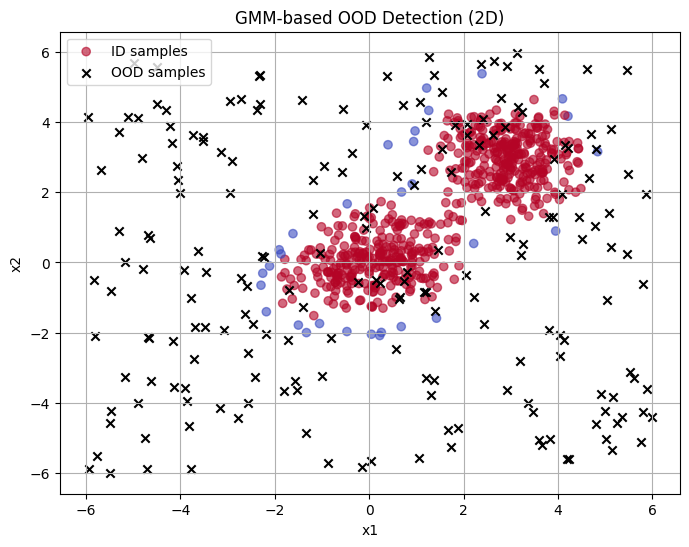

In [1]:
import matplotlib.pyplot as plt
# =========================
# Visualization
# =========================
plt.figure(figsize=(8, 6))
plt.scatter(X_id[:, 0], X_id[:, 1],
            c=pred_id, cmap="coolwarm", alpha=0.6, label="ID samples")
plt.scatter(X_ood[:, 0], X_ood[:, 1],
            c="black", marker="x", label="OOD samples")
plt.legend()
plt.title("GMM-based OOD Detection (2D)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

# GMM Image Segmentation

In this notebook, you will apply Gaussian Mixture Models (GMM) with EM algorithm to perform clustering-based segmentation on color images. You will work with 3-channel images (RGB).

## 1. Gaussian PDF Function

Complete the multivariate Gaussian PDF function. This function will be used in the EM algorithm.


In [ ]:
import numpy as np

def gaussian_pdf(x, mean, cov):

## 2. Implement GMM Class with EM

Fill in the missing parts for the GMM class.


In [ ]:
class GMM:
    def __init__(self, n_components, max_iters=40, tol=1e-3):
        self.K = n_components
        self.max_iters = max_iters
        self.tol = tol

    def initialize(self, X):

    def e_step(self, X):

    def m_step(self, X, gamma):

    def fit(self, X):

    def predict(self, X):
        # TODO: Return the cluster index with highest responsibility


## 3. Segment Image Function

In [1]:
def segment_image(image, K, title):
      """
      Segment a color image using GMM clustering.

      image : ndarray
          Input image (H x W x 3 or grayscale)
      K : int
          Number of clusters
      title : str
          Title for the original image

      """

      # TODO: Resize the image to 256x256
      image = # TODO

      # TODO: If grayscale, convert to 3-channel RGB
      if image.ndim == 2:
          image = # TODO

      H, W, _ = image.shape

      # TODO: Reshape image to N x 3 for GMM
      X = # TODO

      # TODO: Initialize GMM and fit to pixel data
      gmm = # TODO
      # TODO: Fit GMM


      # TODO: Predict cluster labels and reshape labels back to H x W
      labels = # TODO

      # fixed colormap
      cmap = plt.get_cmap("tab10", K)

      # TODO: Create legend handles for each cluster
      legend_elements = # TODO

      plt.figure(figsize=(10, 4))

      plt.subplot(1, 2, 1)
      plt.imshow(image)
      plt.title(f"Original – {title}")
      plt.axis("off")

      plt.subplot(1, 2, 2)
      plt.imshow(label_map, cmap=cmap)
      plt.title("GMM Segmentation (Labels)")
      plt.axis("off")
      plt.legend(handles=legend_elements,
                bbox_to_anchor=(1.05, 1),
                loc="upper left",
                borderaxespad=0.)

      plt.tight_layout()
      plt.show()


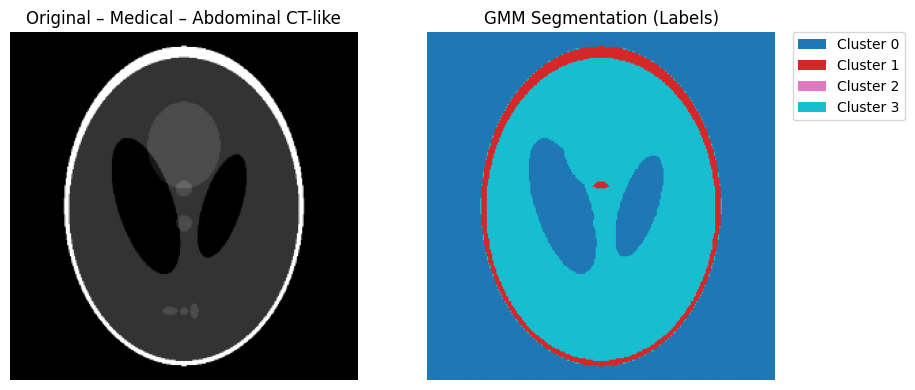

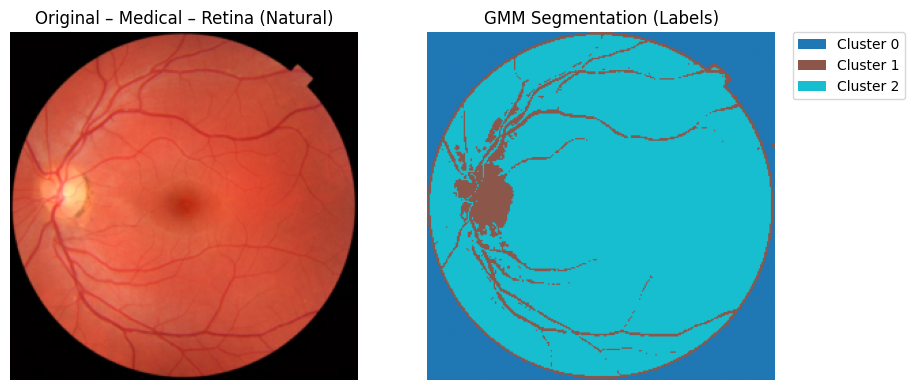

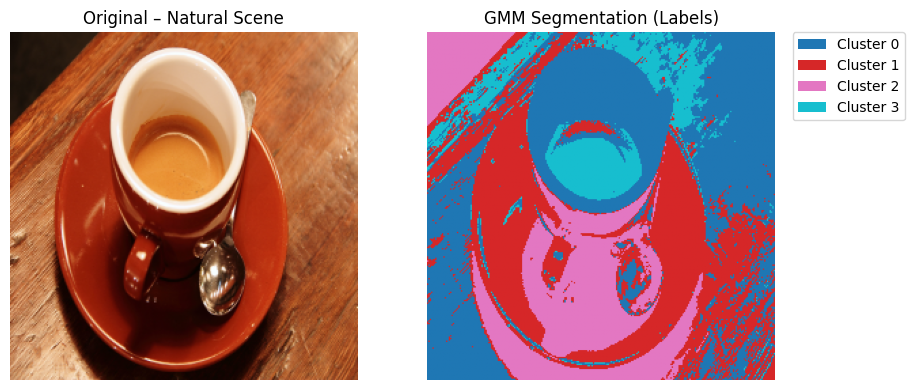

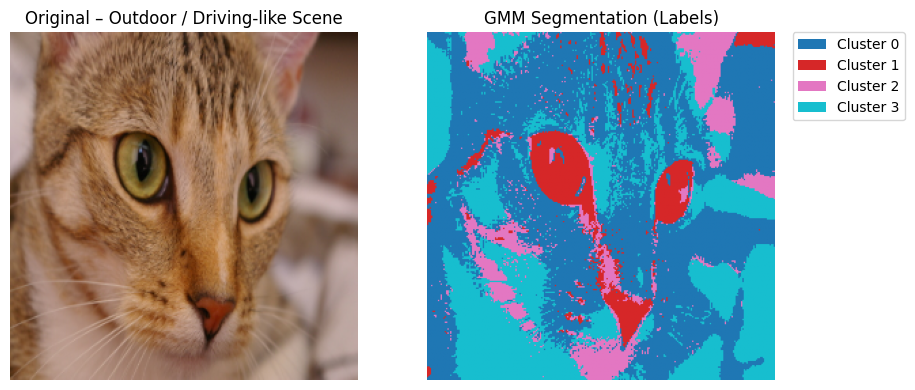

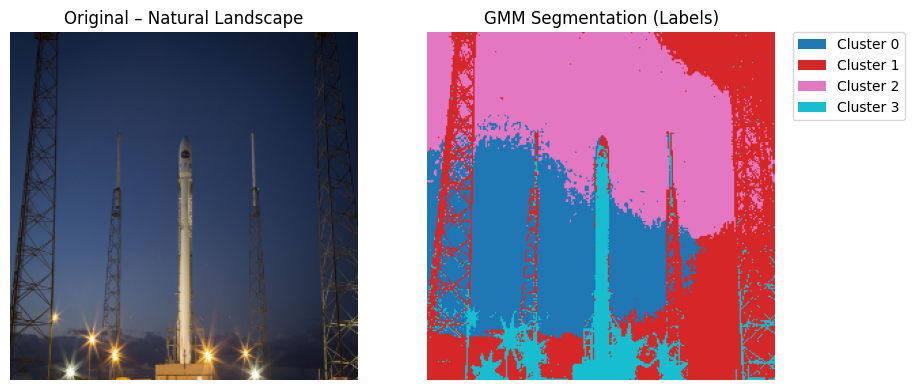

In [5]:
# =========================
# Run experiments
# =========================

segment_image(data.shepp_logan_phantom(), 4,
              "Medical – Abdominal CT-like")

segment_image(data.retina(),  K=3, title="Medical – Retina (Natural)")

segment_image(data.coffee(), 4,
              "Natural Scene")

segment_image(data.chelsea(), 4,
              "Outdoor / Driving-like Scene")

segment_image(data.rocket(), 4,
              "Natural Landscape")
